In [1]:
from netCDF4 import Dataset

dataset= Dataset('/home/jovyan/trim-test_1.nc', 'r', format='NETCDF4_CLASSIC')

In [2]:
import ipywidgets as widgets
from IPython.display import display,clear_output
import matplotlib.pyplot as plt
from ipywidgets import Layout, VBox, HBox
import numpy as np 
import datetime

In [3]:
lista=[[],[],[]]
for n in dataset.variables.keys():
    dimensiones=''
    for i in dataset.variables[n].dimensions:
        dimensiones= dimensiones+" "+i
    lista[0]= np.append(lista[0],n)
    lista[1]= np.append(lista[1],len(dataset.variables[n].dimensions))
    lista[2]= np.append(lista[2],dimensiones)
    

In [4]:
dependencias=[]
for n in lista[2]:
    if n not in dependencias:
        dependencias= np.append(dependencias,n)
    

In [5]:
variables_2d_coor=[]
for i in range(len(lista[0])):
    if lista[1][i]==3 and lista[0][i] not in 'MNKSRC':
        variables_2d_coor= np.append(variables_2d_coor, lista[0][i])

In [6]:
print(variables_2d_coor[:])

['S1' 'KFU' 'KFV' 'TAUKSI' 'TAUETA' 'TAUMAX' 'UMNLDF' 'VMNLDF']


In [7]:
def humanize_time(secs):
    mins, secs = divmod(secs, 60)
    hours, mins = divmod(mins, 60)
    return '%02d:%02d:%02d' % (hours, mins, secs)

In [8]:
date=[]
for i in range(len(dataset.variables['time'])-1):
    date=np.append(date, humanize_time(dataset.variables['time'][i]))
    print(date[i])

00:00:00
06:00:00
12:00:00
18:00:00


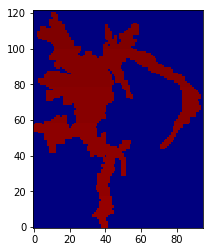

In [9]:
plt.imshow(dataset.variables['XCOR'][:,:],\
        cmap= plt.get_cmap('jet'), aspect='equal', origin='lower')

In [10]:
valor_x= widgets.IntText(
    value=0,
    description='x'
)
valor_y= widgets.IntText(
    value=0,
    description='y'
)

boton_OK= widgets.Button(
    description='OK'
)

In [11]:
drop_var=widgets.Dropdown(
    options=[(variables_2d_coor[n], n) for n in range(len(variables_2d_coor))],
    value=0,
    description='Variables:',
)

In [12]:
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='center',
                    width='100%')


vb= VBox([valor_x, valor_y])
hb=HBox([drop_var,vb, boton_OK], layout=box_layout)

In [13]:
propiedades=[[],[],[]]

In [14]:
def variable_on_change(v):
    propiedades[0]=variables_2d_coor[v['new']]
    actualiza_display()
    
drop_var.observe(variable_on_change, names='value')

In [15]:
def actualiza_display():
    clear_output(wait=False)
    display(hb)  
    plt.show()
    

In [16]:
def pinta_plot():
    axs = plt.subplot()

    eje_x=[date[i] for i in range(len(dataset.variables['time'])-1)]
    eje_y=[dataset.variables[propiedades[0]][i,propiedades[1],propiedades[2]] for i in range(len(dataset.variables[propiedades[0]])-1)]
    
    axs.plot(eje_x,eje_y)
    axs.set_title(propiedades[0])
    axs.set_xlabel('time')
    axs.set_ylabel('m')

In [17]:
def pinta_mapa():
    mapa= plt.subplot()
    mapa.imshow(dataset.variables['XCOR'][:,:],\
        cmap= plt.get_cmap('jet'), aspect='equal', origin='lower')
    

In [18]:
def on_button_clicked(b):
    propiedades[1]=valor_x.value
    propiedades[2]=valor_y.value

    pinta_plot()
    actualiza_display()


boton_OK.on_click(on_button_clicked)

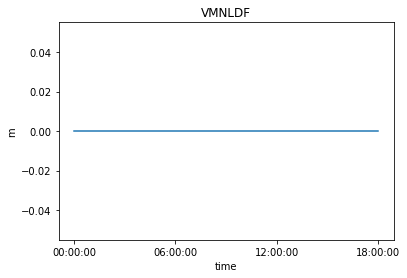

In [19]:
propiedades[0]=variables_2d_coor[0]
propiedades[1]=valor_x.value
propiedades[2]=valor_y.value
display(hb)